In [2]:
import pandas as pd

data = pd.read_csv('datasets/dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.8352
Precision: 0.8571
Recall: 0.8400
F1 Score: 0.8485


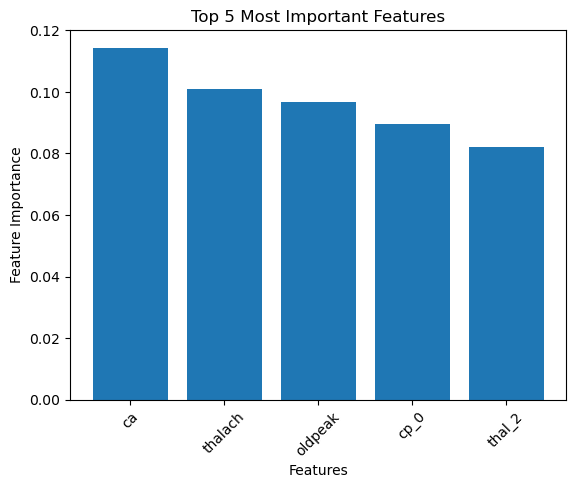

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Q1. Preprocess the dataset
data.dropna(inplace=True)
X = data.drop('target', axis=1)
y = data['target']
X_encoded = pd.get_dummies(X, columns=['cp', 'slope', 'thal'])

# Q2.Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Q3. Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Q4. Evaluate the performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Q5. Get feature importances and visualize
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = X_encoded.columns[sorted_indices[:5]]
plt.bar(top_features, feature_importances[sorted_indices[:5]])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 5 Most Important Features')
plt.xticks(rotation=45)
plt.show()

# Q6. Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Q7. Report the best hyperparameters and performance metrics
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
best_y_pred = best_rf_classifier.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred)
best_f1 = f1_score(y_test, best_y_pred)

print("Best Hyperparameters:", best_params)
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# Q8. Decision boundaries visualization (using first 2 features)
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_train.values[:, :2], y_train.values, clf=best_rf_classifier, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()

